<a href="https://colab.research.google.com/github/samhuairen/Deeplearning-with-python/blob/main/chapter5_%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%9F%BA%E7%A1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **机器学习基础**
本章内容包括
1. 理解机器学习的根本方法，也就是优化和泛化之间的矛盾
2. 机器学习的评估方法
3. 改进模型拟合的最佳做法
4. 提高泛化能力的最佳做法


5.1 机器学习的目标

机器学习的目标就是我们生成一个模型，这个模型在前所未有的数据上能够尽量准确的预测。这个准确的预测越准确越好。但是这个准确是无法控制的，因此我们只能让模型不断的调节，使其能够在前所未见的数据上表现最佳。这里不断的让其表现更佳的同时，我们会使得模型过拟合。因此要平衡过拟合和泛化的关系，使得模型能够在未见过的数据上表现好。


欠拟合和过拟合，欠拟合是指模型在刚学习的时候，随着训练时间的延长，训练数据的损失和验证数据的损失都在下降，这个时候模型还没有完全掌握数据的模式，所以模型还有进一步优化的空间，但是学习一段时间后，训练数据的损失和验证的损失不在降低，反而保持一致。这个时候模型基本到了稳健拟合，再过一会，训练数据的损失会随着学习的时间增加，损失逐渐减少，但是验证数据的损失反而增大了，这个时候说明模型完全掌握了训练数据的信息，但这些信息对于验证数据可能不是很有用。这个时候就是过拟合了。


造成过你的数据因素

1. 数据的含有噪音

如果数据的不确定性很大，或者包含罕见的特征，那么就容易出现过拟合。一些数据比较模糊，比如MNIST数据集中的一些图片，写的非常不像数字，但是他们出现在这些图片数据中，还有的是数据图片是数字，但是标签是错误的，这种情况下如果模型把这些情况都考虑进入，泛化能力就会减弱。


2. 数据的模糊性
并不是所有的数据噪声都是来自误差，有的数据本身就具有模糊性，比如要判读一个香蕉是成熟的，未成熟还是腐烂的。这些指标本身就具有模糊性，因为每一个人的标准不一样。同样的情况是数据包含很多随机性，比如利用气压数据来预测明天是否下雨，即使数据相同，明天出现下雨或者不下雨的概率是不一样的。模糊性可能会对特征空间的不确定区域过于自信，从而对这种数据过拟合。


In [1]:
# 代码清单5-1 向MNIST数据集添加白噪声通道或者全零通道
from tensorflow.keras.datasets import mnist
import numpy as np
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images_with_noise_channels.shape)
print(train_images_with_zeros_channels)


In [ ]:
#代码清单 5-2 对于带有噪声通道或者全零通道的MNIST数据，训练相同的模型
from tensorflow import keras
from tensorflow.keras import layers
def get_model():
  model = keras.Sequential(
      [layers.Dense(512, activation='relu'),
       layers.Dense(10, activation='softmax')
       ])
  model.compile(optimizer='rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model

model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_zeros = model.fit(train_images_with_zeros_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)



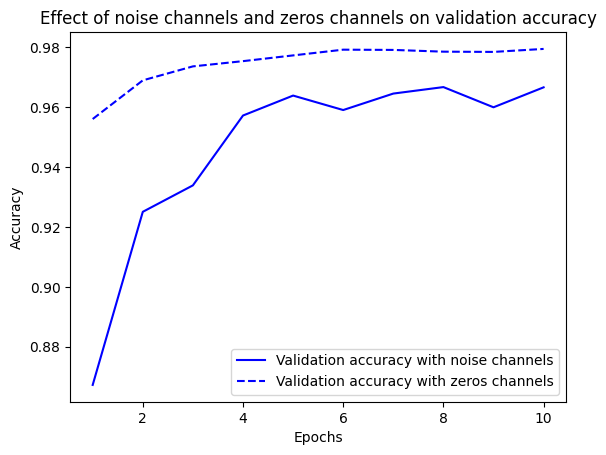

In [4]:
# 代码清单5-3 绘图比较验证精度
import matplotlib.pyplot as plt
val_noise_acc = history_noise.history['val_accuracy']
val_zeros_acc = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_noise_acc,'b-', label='Validation accuracy with noise channels' )
plt.plot(epochs, val_zeros_acc,'b--', label='Validation accuracy with zeros channels' )
plt.title('Effect of noise channels and zeros channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


从上面的图可以看出，添加噪声的数据的精度要比不添加噪声的数据精度低1%，这完全是由于虚假信息造成的，添加的噪声信息越多，预测的准确性就会降低。因此，我们应该收集噪声比较小的数据。

5.1.2 深度学习的本质

只要模型有足够的表示能力，就可以训练模型拟合任何数据

In [2]:
# 代码清单 5-4 将标签随机打乱，拟合一个MNIST模型
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
results = model.fit(train_images, random_train_labels, epochs=100, batch_size=128, validation_split=0.2, verbose=0)


11490434/11490434 [==============================] - 1s 0us/step


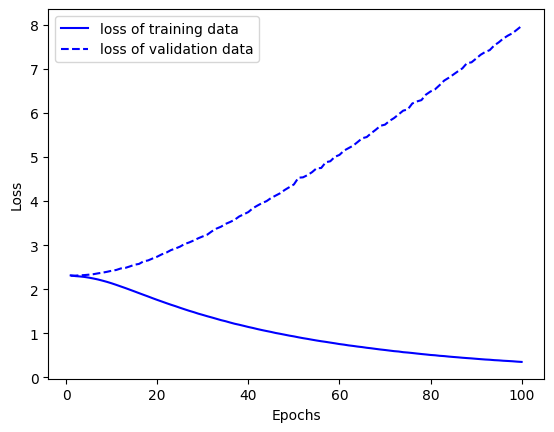

In [5]:
#plot loss and accuracy of validation set
import matplotlib.pyplot as plt
results.history.keys()
val_loss = results.history['val_loss']
loss = results.history['loss']
epochs = range(1, 101)
plt.plot(epochs, loss,'b-', label='loss of training data')
plt.plot(epochs, val_loss,'b--', label='loss of validation data')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()


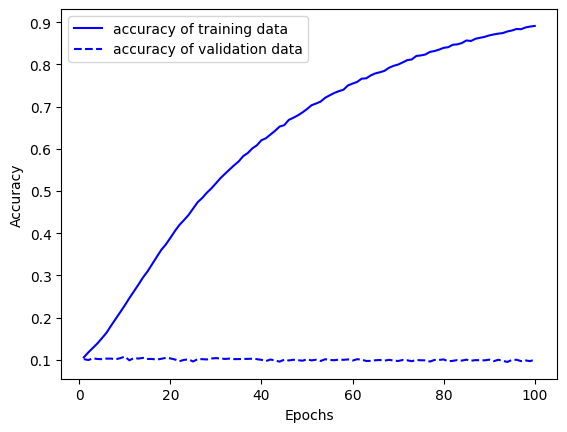

In [6]:
val_acc = results.history['val_accuracy']
acc = results.history['accuracy']
epochs = range(1, 101)
plt.plot(epochs, acc,'b-', label='accuracy of training data')
plt.plot(epochs, val_acc,'b--', label='accuracy of validation data')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

对于这种随机打乱的标签，可以发现模型能够在训练数据上很好的拟合，损失值在不断的降低，对于的准确性也不断的提到。可以发现模型对这种数据可以不断的学习和拟合，但是这种训练好的模型在验证数据上就无法泛化，也就是准确性极低。深度学习的模型可以拟合任何数据，但是无法泛化从未见过的数据。

深度学习泛化的本质与深度学习模型本身关系不大，而与现实世界中信息结构密切相关
对于MNIST数据集，就是一个有0-255个数字构成的在28 *28 的数组，这个数组的意思是长度是784，其中每一个数字都是0-255中的一个。所以这个总的所有可能的类型有255**784， 这个数据非常大，比宇宙中的原子的数目还大。但是在这么大的父空间中，仅仅有个别是我们手写的数字构成的空间。这个是子空间。这个子空间是一种随机的，高度结构化的。
一种高度结构化的子空间，是一个非常连续的，如果稍加修改就会变成另一个可以识别的数字。因此有效子空间中所有样本都由穿过子空间的光滑路径连接。也就是说在我们取样的MNIST数据中两个样本A，和B之间有许多中间类型的数字，其中每两幅相邻的图片都非常相似。在两个类别的边界附近可能会有一些模棱两可的形状，但是他们仍然看起来像数字


# **流形假说**
流形就是一个可能性的空间，比如手写数字在28*28 unit8数组的可能性空间构成一个流形。流形是指父空间的低维度空间，它局部近似于一个线性空间（欧几里得空间）。
流形假说假定，所有自然数据都位于高维空间中的一个低维流形中，这个高维空间是数据编码空间。这是关于宇宙信息结构的一个非常有力的表述。

流形假说意味着：
1. 机器学习模型只需要在其输入空间中拟合相对简单，低维，高度结构化的子空间（潜在流形）
2. 在其中一个流形中，总是可以在两个输入之间进行插值，也就是说通过能够在样本之间进行差值是理解深度学习泛化的关键



# **插值作为泛化的来源**

流形插值：潜在流形中的中间点
线性插值：编码空间中的平均值
在潜在流形中的插值与父空间中的线性插值不同，例如：两个MNIST手写数字的像素平均值通常不是一个有效数字。
至关重要的是，虽然深度学习实现泛化的方法是对数据流形的学习近似进行插值，但插值不是泛化的全部，它只是冰山一角。插值只能帮助你理解那些与之前未见过的非常接近的事物，即插值可以实现局部泛素化。
人类能够进行极端泛化，这是由于不同插值的认知极致实现的，包括抽象，世界的符号模型，推理，逻辑，常识以及关于世界的先验知识，我们通常称之为理性。
理性是相对于直觉和模式的，后者是可以插值的，但是理性不是可以插值的。

# **深度学习为何有效**

皱纸团比喻，一张纸表示三维空间中的二维流形，深度学习的模型是一个工具，用于让纸团恢复平整，也就是揭开潜在的流形。
深度学习模型本质上是一个高维曲线，一条光滑连续的曲线，因为它是可微的。通过梯度下降，这条曲线平滑，渐进地对数据点进行拟合，就其本质而言，深度学习就是取一条大而复杂的曲线（流形）并逐步调节其参数，直到曲线拟合了一些训练数据点。



# **评估机器学习模型**
5.2.1 训练集，验证集和测试集
在训练集上训练模型，在验证集上评估模型。在模型进行上线之前，在测试数据上做最好一轮的测试，之后就可以上线了。这里的测试数据要尽可能的与生产数据相似。做完这些就可以部署该模型上线使用了。

用验证集开评估模型和优化模型的过程中有一个非常重要的因素是信息泄露，当我们每次用验证数据来反馈模型进行超参数配置的时候，我们就泄漏了一些信息，尽管我们的验证集是不用来训练模型的。这个过程中也非常容易导致过拟合，因此，我们需要用测试集来准确的量化模型的泛化能力。测试数据不能透露一点信息，也不能做任何的处理。这样的测试数据才能准确的反映模型的泛化能力。
评估机器学习的方法有三大类：
1. 简单的留出验证
2. K折交叉验证
3. 带有打乱数据的重复K折交叉验证
以及基于常识的基准


1. 简单的留出验证
这里就是把整数数据划分为三类，一部分是训练集，一部分是测试集，在训练集的数据中留出一部分做验证集。测试集是衡量模型的关键数据，这部分数据不做任何修改。对测试集进行标准化的均值和标准差都是基于训练数据上获得的。（第四章99页）。


In [ ]:
# 代码清单 5-5 留出验证
num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples] #定义验证集
training_data = data[num_validation_samples:] #定义训练集
# 开始训练模型
model1 = get_model()
model1.fit(training_data, training_labels,epochs=20) #在训练数据上训练模型，然后在验证集上进行评估模型
validation_score1 = model.evaluate(validation_data, validation_labels) # 在验证集上评估模型
#...
model2 = get_model() # 根据上面的评估跟新模型
model2.fit(training_data, training_labels,epochs=20)
validation_score2 = model.evaluate(validation_data, validation_labels)
#...
model3 = get_model() # 根据上面的评估跟新模型
model3.fit(training_data, training_labels,epochs=20)
validation_score3 = model.evaluate(validation_data, validation_labels)
#... 现在可以更新模型，重新训练，评估，然后再次调节

model = get_model() # 新的一个上面调好超参数的模型，用于对训练集和验证集一起的数据进行从头开始训练模型
model.fit(np.concatenate([training_data, validation_data]), np.concatenate([training_labels, validation_labels]),
          ...)
test_score = model.evaluate(test_data, ...) # 测试集上评估模型



2. K折交叉验证

In [ ]:
# 代码清单 5-6 K折交叉验证
k = 3
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []
for fold in range(k):
  validation_data = data[num_validation_samples * fold: num_validation_samples * (fold + 1)] # 选择验证集
  training_data = np.concatenate(                                                            # 选择训练集
      data[:num_validation_samples * fold],
      data[num_validation_samples * (fold + 1):]
  )
  model = get_model() # 创建一个模型，新的模型，未训练
  model.fit(training_data, ...)
  validation_score = model.evaluate(validation_data, ...)
  validation_scores.append(validation_score)
validation_score_average = np.mean(validation_scores) # 验证分数是K折交叉的平均分

model = get_model() # 上面的一个新模型
model.fit(data,...) # 在所有非测试的数据上重新训练模型
test_score = model.evaluate(test_data, ...)

3. 带有打乱数据重复的K折交叉验证
这个通常是由于数据非常少，但又要去比较高的精度，这种做法就是通常在K折交叉验证前，将数据打乱，然后多次进行K折交叉验证。缺点是计算比较耗时。计算量是P*K， P是重复次数，K是折数。


5.2.2 超越基于常识的基准

常识的基准，就是对于任何一个预测模型，我们都有一个常识的基准来判断，我们学习的模型是否朝着正确的方向发展。比如我们判断一个二分类问题，我们的常识是这个模型的准确性在50%以上，不然我们利用随机性都有50%的机会判断。因此，当模型沿着基准的方向发展时，我们判断模型时有效的，可以进行改良。

此外，在对模型进行评价时，应该注意以下几点
1. 数据代表性，数据必须在训练数据和测试数据都有代表性，不能训练数据中只有部分样本，测试数据中有另一部分样本。这样的模型无法预测测试数据。
2. 时间箭头，对于时间序列的数据，不能随机打乱，如果模型提前学习了未来时间段的数据，就会发生时间泄漏。一定要训练数据是测试数据之后的时间段产生的。
3. 数据冗余。不能把相同的数据分别放在训练数据和测试数据中去，如果这样的话，模型提前掌握了测试数据。训练数据和测试数据没有交集。

# **5.3 改进模型拟合**

为了实现完美拟合，首先必须实现过拟合。因为不知道界限在哪里，所以首先的穿越界限。我们的目标是建立一个具有一定泛化能力并且能够过拟合的模型。在得到了这个模型后，我们再通过降低模型的过拟合来提高泛化能力。

创建的3个问题：
1. 训练不开始： 训练损失不随着时间的推移而减少
2. 训练开始的很好，但是模型没有真正的泛化：模型无法超越基于常识的基准
3. 训练损失和验证损失都随着时间的推移而减少，模型可以超越基准，但是无法过拟合，这表示模型还仍然处于欠拟合的状态

解决办法
# 5.3.1 调节关键的梯度下降参数
梯度下降过程中参数的优化：优化器，模型权重初始值的分布，学习率和批量大小，保持一两个不变，逐步调节其他参数就可以优化。


In [3]:
# 代码清单 5-7 使用过大的学习率来训练MNIST模型
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential(
    [layers.Dense(512, activation='relu'),
     layers.Dense(10, activation='softmax')]
)
model.compile(optimizer=keras.optimizers.RMSprop(1.0),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 522.7560 - accuracy: 0.3292 - val_loss: 2.2186 - val_accuracy: 0.2429
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5929 - accuracy: 0.2106 - val_loss: 2.2797 - val_accuracy: 0.2478
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8732 - accuracy: 0.1850 - val_loss: 2.4913 - val_accuracy: 0.1948
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5164 - accuracy: 0.1593 - val_loss: 2.3024 - val_accuracy: 0.1646
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4860 - accuracy: 0.1431 - val_loss: 2.4037 - val_accuracy: 0.1117
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4098 - accuracy: 0.1722 - val_loss: 2.5771 - val_accuracy: 0.2186
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5010 - accuracy: 0.1764 - val_loss: 2.4422 - val_accuracy: 0.1046
Epoc

In [6]:
# 代码清单 5-8 使用较小的学习率来训练MNIST模型
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential(
    [layers.Dense(512, activation='relu'),
     layers.Dense(10, activation='softmax')]
)
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2940 - accuracy: 0.9146 - val_loss: 0.1536 - val_accuracy: 0.9557
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1222 - accuracy: 0.9636 - val_loss: 0.1061 - val_accuracy: 0.9686
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0805 - accuracy: 0.9765 - val_loss: 0.0917 - val_accuracy: 0.9727
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0573 - accuracy: 0.9831 - val_loss: 0.0852 - val_accuracy: 0.9738
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0428 - accuracy: 0.9873 - val_loss: 0.0779 - val_accuracy: 0.9756
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0846 - val_accuracy: 0.9747
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0244 - accuracy: 0.9931 - val_loss: 0.0762 - val_accuracy: 0.9787
Epoch 

遇到上述问题，一般通过两种方法来解决：
1. 增大或者降低学习率来。学习率过大，可能会导致权重的跟新大大超过正常拟合的范围。如果学习率过小，则可能导致训练过于缓慢，几乎停止
2. 增加批量大小，批量增大会包含更多的样本，那么梯度将包含更多的信息且噪声变少。


# 5.3.2 利用更好的架构预设
当模型能够拟合训练数据，但是无法泛化的时候需要思考几个问题。1是这个数据本身的问题，数据不包含足够的信息来进行泛化。比如我们用一个打乱标签的MNIST睡觉进行试验的时候发现，模型能够在训练数据上表现出很高的准确性，但是在验证数据上无法提高泛化能力。这种情况在于数据本身。2是使用了不得当的架构，对于MNIST数据集可以使用密集的架构模式，但对于时间序列的数据使用这种架构模式就不能很好的泛化。一个解决的方案是使用循环架构。不同的数据类型，不同的问题应该使用一个合理的数据架构模式


# 5.3.3. 提高模型容量
如果能够得到一个模型，它能够使得验证指标下降，并且具有一定的泛化能力，那说明这个模型快要成功了。我们所做的就是让这个模型达到过拟合。
现看一下这个小例子


In [ ]:
# 代码清单 5-9 在MNIST上训练一个简单的logistic模型
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential(
    [layers.Dense(10, activation='softmax')]
)
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_small_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)




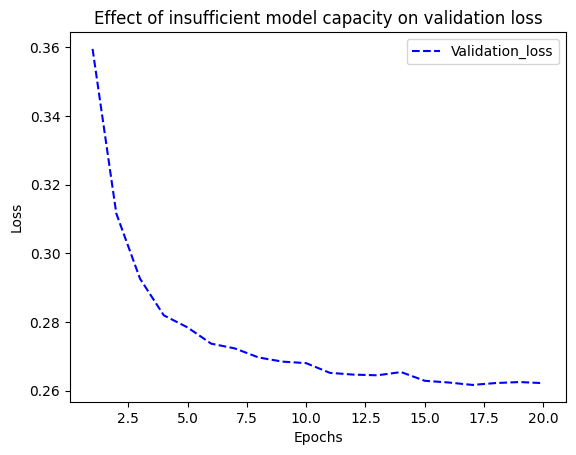

In [9]:
# plot the loss of validation among all 11 epochs
import matplotlib.pyplot as plt
loss_val = history_small_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss_val, 'b--', label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.legend()
plt.show()

上图可以看出验证指标似乎保持不变，而不是达到峰值后扭转方向。训练损失达到0.26后就保持不变。这说明我们的模型可以拟合，但是无法实现过拟合。这种情况的原因就是模型的容重不够，没有足够的表示能力。我们需要做的是增加层数，或者增大层数（拥有更多信参数的层），或者改变预设架构。下边的代码是对上面的模型进行进一步的改进。增加层数，并且增加层的参数。


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential(
    [layers.Dense(96, activation='relu'),
     layers.Dense(96, activation='relu'),
     layers.Dense(10, activation='softmax')]
)
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_large_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)


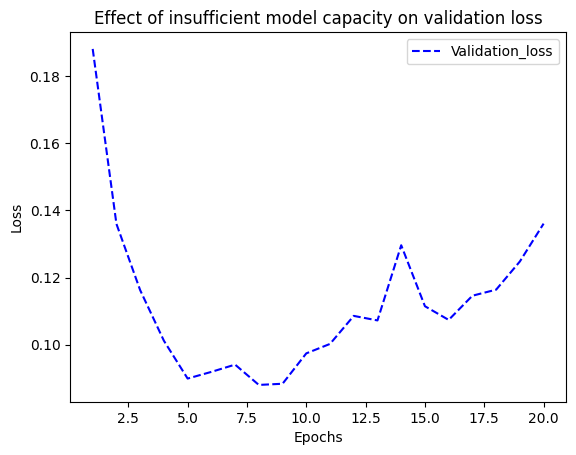

In [10]:
# plot the loss of validation among all 11 epochs of a large model
import matplotlib.pyplot as plt
loss_val = history_large_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss_val, 'b--', label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.legend()
plt.show()

可以看出在增加了层数和更多的参数后，验证指标达到了最低点，然后沿着反方向增大，表示数据过拟合。接下来我们做的就是提高模型的泛化能力。

# **5.4 提高泛化能力**
5.4.1 数据集管理
1. 确保足够的数据
2. 尽量减少标签错误
3. 清洗数据并做缺失值处理
4. 如果有很多特征，我们不确定那个特征是真正有用的，需要做特征选择。

5.4.2 特征工程

所谓特征工程就是对数据的特征进行更好的表示，比如用不同的表示方法来显示一个数据的特征，对于深度学习来说解决问题是有不同的效率或者更高效的方法。如果用简单的表示来说明特征，那么深度学习的流行就会变得更加平滑，更简单，更有条理。良好的特征工作会更加优雅的解决问题，如果数据能用更简单更有意义的表示方法，深度学习所需要的模型就会简单很多，占用的资源也少。此外，在数据比较少的情况下，对特征的深入理解和表示是非常重要的。

5.4.3 提前终止

在训练过程中找到最佳泛化的拟合，即欠拟合曲线和过拟合曲线之间的确切曲线，是提高泛化能力的最有效方法之一。
这就是说我们先让模型进行过拟合的训练，看验证指标在这个过程中出现先下降再上升的曲线，从而确认欠拟合和过拟合的分界点，然后重新再根据刚才的分界点训练模型，使得模型的泛化能力达到最大。也可以在模型中进行其他参数的添加EarlyStopping回调函数来实现，当模型发现验证指标从下降到变大的那一刻是停止训练，用这个阶段的模型参数进行预测就可以。
5.4.4 模型正则化

正则化是一种平衡模型容量过大和容量不足的一种最佳实践组合。就是让模型能够完全拟合训练数据，但又不能使它过拟合数据，其目的是提高模型的验证能力。
常用的正则化方法：
1. 缩减模型的容重，模型的容重减少了，就使得模型不能快速过拟合。减少容重的方法就是减少模型的表示层以及表示层的单元数。如果模型的记忆资源有限，它就不能简单地记住训练数据；为了让损失最小化，它必须学会对目标又预测能力的压缩表示。但是没有一种公式来衡量这种度量，一个办法就是不断的尝试，现用较小的层数和较少的单元数来训练模型，然后再提高层数和每层的单元数，来比较两种不同模型的验证损失。即过拟合出现的早晚，以及过拟合后验证损失是否很快就变得很大，还是保持缓慢的变大。


In [ ]:
# 代码清单5-10 初始模型
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimention=10000):
  results = np.zeros((len(sequences), dimention))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1
  return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential(
    [layers.Dense(16, activation='relu'),
     layers.Dense(16, activation='relu'),
     layers.Dense(1, activation='sigmoid')]
)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)


In [ ]:
# 代码清单5-11 容量较小的模型
model = keras.Sequential(
    [layers.Dense(4, activation='relu'),
     layers.Dense(4, activation='relu'),
     layers.Dense(1, activation='sigmoid')]
)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_small_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

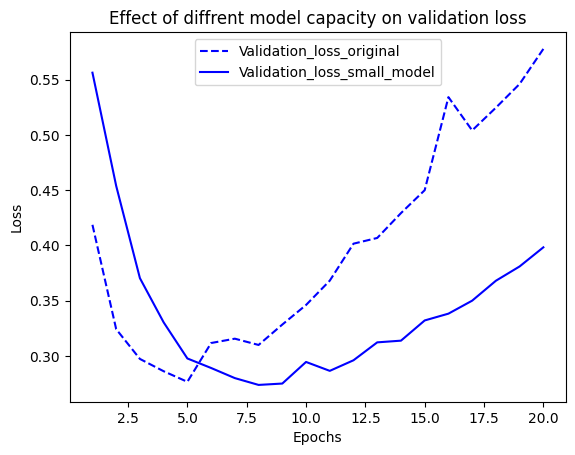

In [6]:
# 比较这两种模型的验证损失
import matplotlib.pyplot as plt
loss_val_orignal = history_original.history['val_loss']
loss_val_small_model = history_small_model.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, loss_val_orignal, 'b--', label='Validation_loss_original')
plt.plot(epochs, loss_val_small_model, 'b', label='Validation_loss_small_model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Effect of diffrent model capacity on validation loss')
plt.legend()
plt.show()

可以看出，使用较小的模型容重后，模型出现过拟合的时间要晚，并且验证的指标在过拟合后没有迅速的增大，这说明容重较小的模型不容易过拟合，也没有很强的记忆能力。相反，较大容重的模型能够迅速记住训练模型的数据，并且很快出现过度拟合。


In [7]:
# 代码清单5-12 容量较小的模型
model = keras.Sequential(
    [layers.Dense(512, activation='relu'),
     layers.Dense(512, activation='relu'),
     layers.Dense(1, activation='sigmoid')]
)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_large_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 20s 645ms/step - loss: 0.5711 - accuracy: 0.7223 - val_loss: 0.4422 - val_accuracy: 0.7986
Epoch 2/20
30/30 [==============================] - 17s 553ms/step - loss: 0.3236 - accuracy: 0.8677 - val_loss: 0.4392 - val_accuracy: 0.8110
Epoch 3/20
30/30 [==============================] - 11s 374ms/step - loss: 0.2415 - accuracy: 0.9017 - val_loss: 0.3131 - val_accuracy: 0.8679
Epoch 4/20
30/30 [==============================] - 11s 373ms/step - loss: 0.1864 - accuracy: 0.9269 - val_loss: 0.3750 - val_accuracy: 0.8506
Epoch 5/20
30/30 [==============================] - 11s 365ms/step - loss: 0.1537 - accuracy: 0.9413 - val_loss: 0.3035 - val_accuracy: 0.8737
Epoch 6/20
30/30 [==============================] - 10s 338ms/step - loss: 0.1024 - accuracy: 0.9654 - val_loss: 0.3332 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 12s 384ms/step - loss: 0.0893 - accuracy: 0.9713 - val_loss: 0.3691 - val_accuracy: 0.8783

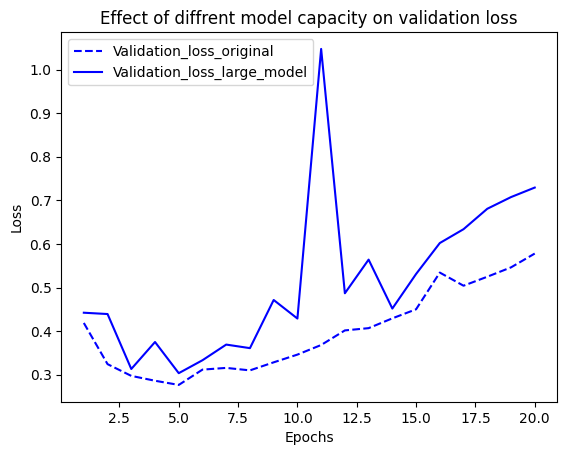

In [8]:
# 比较这两种模型的验证损失
import matplotlib.pyplot as plt
loss_val_orignal = history_original.history['val_loss']
loss_val_large_model = history_large_model.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, loss_val_orignal, 'b--', label='Validation_loss_original')
plt.plot(epochs, loss_val_large_model, 'b', label='Validation_loss_large_model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Effect of diffrent model capacity on validation loss')
plt.legend()
plt.show()

可以看出使用较大容重的模型后，仅仅1轮之后，模型就达到过拟合，而且过拟合的程度非常高。验证损失波动非常大。训练损失很快接近与0。模型的容重越大，模型训练的速度就越快（得到很小的训练损失）， 但也很容易过拟合，导致训练损失和验证损失有很大的差异。

# 2 添加权重正则化

简单模型比复杂模型更不容易过拟合。这里的简单模型是指参数分布的熵更小的模型（参数更少的模型）。因此，降低过拟合的一种常见的方法是强制模型权重取更小的值，从而限制模型的复杂度，这使得权重值的分布更加规范。这种方法叫做权重正则化。其实现方法是向模型损失函数中添加与较大权重值相关的成本。这种成本有多种方式：
1. L1 正则化，添加的成本与权重系数的绝对值（权重的L1范数）成正比
2. L2 正则化，添加的成本与权重系数的平方（权重的L2范数）成正比


In [11]:
# 代码清单 5-13 向模型中添加L2权重正则化
from tensorflow.keras import regularizers
model = keras.Sequential(
    [layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
     layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
     layers.Dense(1, activation='sigmoid')]
)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_l2_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 130ms/step - loss: 0.6055 - accuracy: 0.7830 - val_loss: 0.4723 - val_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.4086 - accuracy: 0.8923 - val_loss: 0.4078 - val_accuracy: 0.8702
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3387 - accuracy: 0.9107 - val_loss: 0.3651 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3029 - accuracy: 0.9233 - val_loss: 0.3612 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2775 - accuracy: 0.9329 - val_loss: 0.3567 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 2s 71ms/step - loss: 0.2605 - accuracy: 0.9389 - val_loss: 0.3687 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2516 - accuracy: 0.9425 - val_loss: 0.3675 - val_accuracy: 0.8844
Epoch 8/20
3

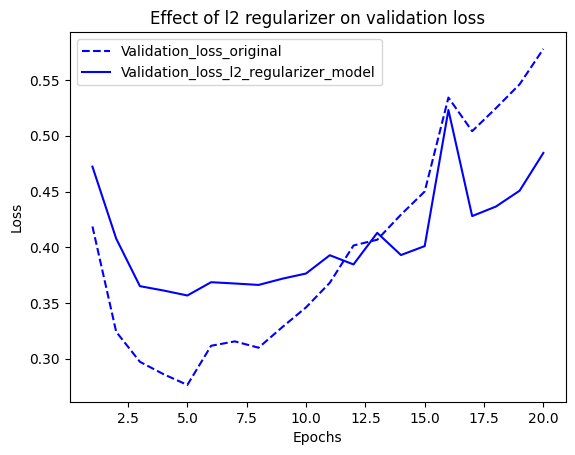

In [12]:
# 比较这两种模型的验证损失
import matplotlib.pyplot as plt
loss_val_orignal = history_original.history['val_loss']
loss_val_history_l2_reg = history_l2_reg.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, loss_val_orignal, 'b--', label='Validation_loss_original')
plt.plot(epochs, loss_val_history_l2_reg, 'b', label='Validation_loss_l2_regularizer_model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Effect of l2 regularizer on validation loss')
plt.legend()
plt.show()

从上图看出，只改变l2 regularizer 后，验证损失会变大，过拟合会晚，并且验证损失变化的较初始模型要缓慢。更不容易出现过度拟合。

In [ ]:
# 代码清单5-14 使用keras中不同的权重正则化项
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)


# 3 添加dropout
dropout是指在训练过程中随机舍弃该层的一些输出特征，比如设定为0。dropout比率是指设定为0的特征所占的比例，通常在0.2-0.5之间。测试时没有单元被舍弃，相应的该层的输出值要按照dropout比率缩小，因为这时比训练时有更多的单元被激活，需要加以平衡。

考虑到某层输出的Numpy矩阵layer_output, 其形状为（batch_size, features）,训练时，我们随机将某些值设定为0


In [ ]:
layer_output *= np.random.randint(0, high=2, size=layer_output.shape) # 训练时将50%的输出单元设定为0


测试时，我们将输出按照dropout比率缩小，这里我们乘以0.5（因为训练时舍弃了一般的单元）


In [ ]:
layer_output *= 0.5 # 测试时

In [13]:
# 代码清单 5-15， 向IMDB模型中添加dropout
model = keras.Sequential(
    [layers.Dense(16, activation='relu'),
     layers.Dropout(0.5),
     layers.Dense(16, activation='relu'),
     layers.Dropout(0.5),
     layers.Dense(1, activation='sigmoid')]
)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_dropout = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 119ms/step - loss: 0.6174 - accuracy: 0.6545 - val_loss: 0.4962 - val_accuracy: 0.8326
Epoch 2/20
30/30 [==============================] - 1s 49ms/step - loss: 0.4938 - accuracy: 0.7701 - val_loss: 0.3945 - val_accuracy: 0.8636
Epoch 3/20
30/30 [==============================] - 3s 92ms/step - loss: 0.4152 - accuracy: 0.8237 - val_loss: 0.3393 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 3s 87ms/step - loss: 0.3596 - accuracy: 0.8586 - val_loss: 0.3071 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 2s 70ms/step - loss: 0.3217 - accuracy: 0.8804 - val_loss: 0.2786 - val_accuracy: 0.8921
Epoch 6/20
30/30 [==============================] - 2s 73ms/step - loss: 0.2875 - accuracy: 0.8997 - val_loss: 0.2766 - val_accuracy: 0.8907
Epoch 7/20
30/30 [==============================] - 2s 77ms/step - loss: 0.2570 - accuracy: 0.9137 - val_loss: 0.2761 - val_accuracy: 0.8916
Epoch 8/20
3

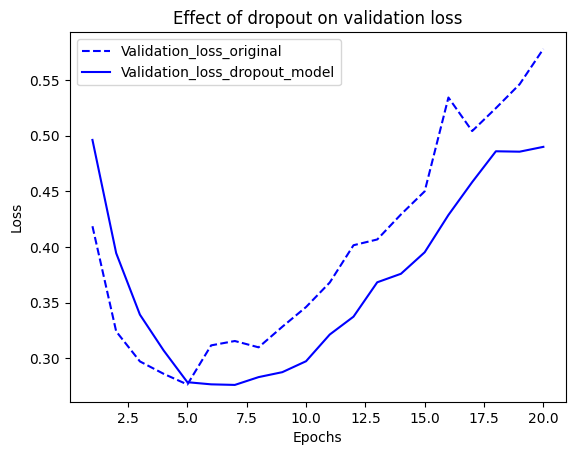

In [14]:
# 比较这两种模型的验证损失
import matplotlib.pyplot as plt
loss_val_orignal = history_original.history['val_loss']
loss_val_dropout = history_dropout.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, loss_val_orignal, 'b--', label='Validation_loss_original')
plt.plot(epochs, loss_val_dropout, 'b', label='Validation_loss_dropout_model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Effect of dropout on validation loss')
plt.legend()
plt.show()

从上图可以看出，使用dropout后，模型的过拟合比初试模型出现的要晚，并且验证损失也较初始模型要小，而且比较平坦。这说明使用dropout的效果要好很多。
想要神经网络要实现更好的泛化，并防止过度拟合，需要注意以下几点：
1. 用较好的数据，质量较好的数据，噪音较低
2. 更好的特征
3. 缩小模型的容量
4. 使用正则化（添加权重正则化，强制模型使用较低的权重）这个主要是用在较小的模型上
5. 添加dropout

# **本章小结**

1. 机器学习的目的在于泛化，即让模型在未见过的数据上表现出非常好的准确性
2. 神经网络实现泛化的方式是：学习一个参数化模型，这个模型可以成功地在训练数据样本之间进行插值，这样的模型学会了训练数据潜在的流形。
3. 机器学习解决的矛盾就是优化与泛化之间的矛盾。为了实现泛化，首先要实现优化，在一段时间后模型在验证数据上表现了过拟合，所以这个时候要优化泛化。
4. 深度学习模型泛化能力来自于这样一个事实：模型努力逼近数据潜在的流形，从而通过插值来理解新的输入。
5. 开发模型要评估泛化能力。这包括留出验证方法，K折交叉验证，打乱的带有重复的K折交叉验证。始终在验证集上来评估模型， 在验证集上评估模型也发生了一定的信息泄漏
。必须用一个独立的测试集上做最后模型的评估，因为验证集上发生了信息泄漏。
6. 开始建模，首先要让模型能够过拟合，然后在看模型是否有高于基于常识的基准，并且在验证指标上不断优化，具备泛化能力。做法有调整模型的超参数，学习率以及批量大小，更好的架构，增加容重或者延长训练时间。
7. 模型过拟合之后，目标转化为用模型的正则化来提高泛化能力，方法有减少模型的容重，使用正则化，以及使用dropout。这些方法的首选方法是收集更大的数据以及更好的数据。
